# **Laboratorio #2 - Inteligencia de Negocios**

## **Integrantes:**

### Santiago Cabra Chavez - 202110929 - s.cabrac@uniandes.edu.co
### Andres Cardenas Layton - 202122083 - a.cardenasl@uniandes.edu.co
### Tatiana Vera Hernandez - 202113341 - k.verah@uniandes.edu.co

## **1. Preparacion de los Datos - EDA y Prepocresamiento**

### **Carga de Datos:**

In [67]:
pip install pandas numpy scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [68]:
# Cargar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
df = pd.read_csv('Datos_Senecafe.csv', sep=';', encoding='utf-8')

# Visualizar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Revisar dimensiones
print("Dimensiones del dataset (filas, columnas):", df.shape)

# Tipos de variables
print("Tipos de variables:")
print(df.dtypes)

# Revisión rápida de valores nulos
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Identificar columnas numéricas
number_cols = df.dtypes[(df.dtypes == np.int64) | (df.dtypes == np.float64)].index
number_cols = df.select_dtypes(include = ['int','float']).columns
number_cols

# Resumen de las principales estadísticas de las variables numéricas
df[number_cols].describe()

Primeras filas del dataset:


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MetodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Dimensiones del dataset (filas, columnas): (14291, 19)
Tipos de variables:
ID                      object
Area                     int64
Perimetro              float64
LongitudEjeMayor       float64
LongitudEjeMenor       float64
RelacionAspecto         object
Excentricidad          float64
AreaConvexa            float64
DiametroEquivalente    float64
Medida                 float64
Solidez                float64
Redondez               float64
Compacidad             float64
FactorForma1           float64
FactorForma2           float64
FactorForma3           float64
FactorForma4           float64
DefectoVisible          object
MetodoSecado            object
dtype: object
Conteo de valores nulos por columna:
ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solid

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### **Analisis de los datos cargados:**

Para poder comenzar a entender los datos, se realiza un proceso de analisis exploratorio, para lo cual se generaron Histogramas que permiten visualizar los valores de las columnas numericas, Boxplots para poder identificar valores que se encuentren en los extremos, un conteo de valores para las columnas categoricas (excluyendo ID) y la presentacion de una matriz de correlacion entre las columnas numericas.

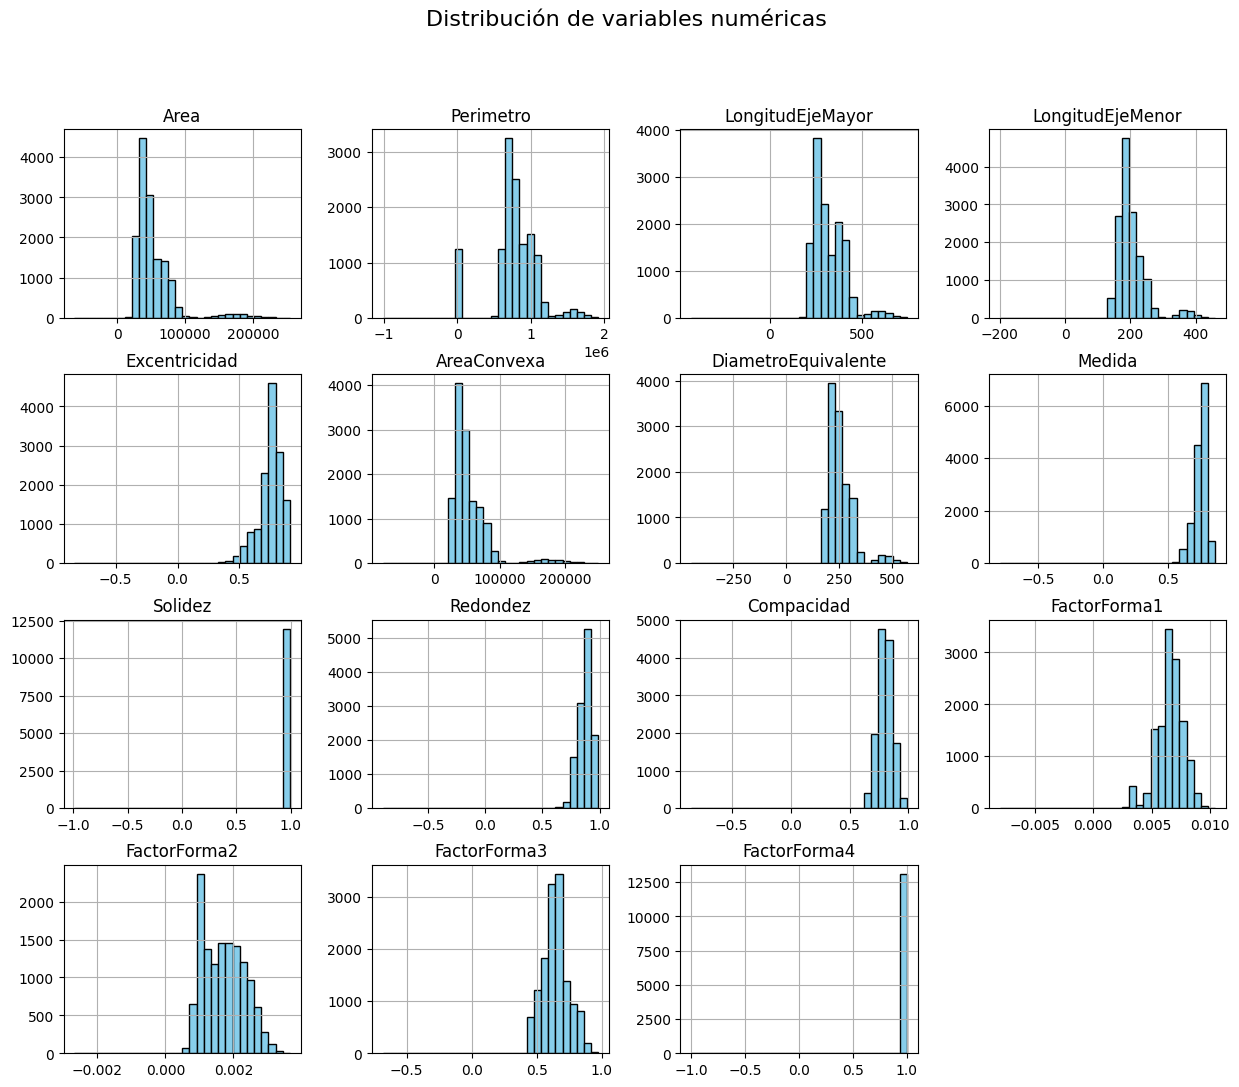

<Figure size 1500x800 with 0 Axes>

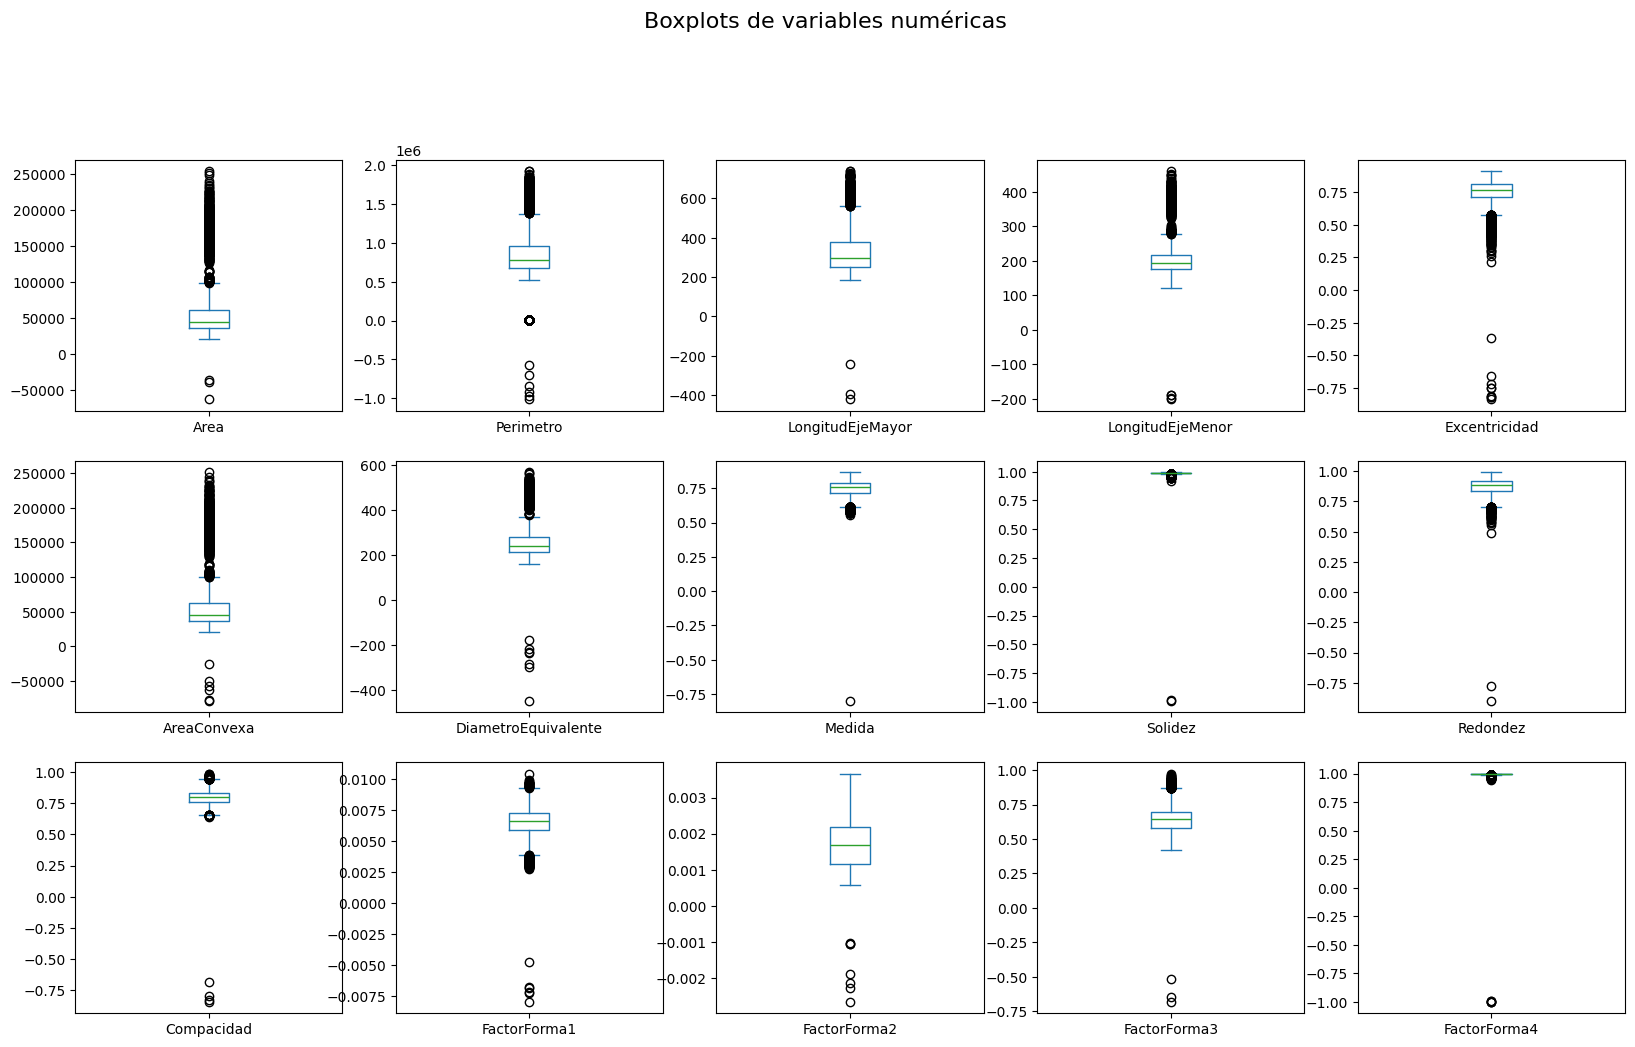

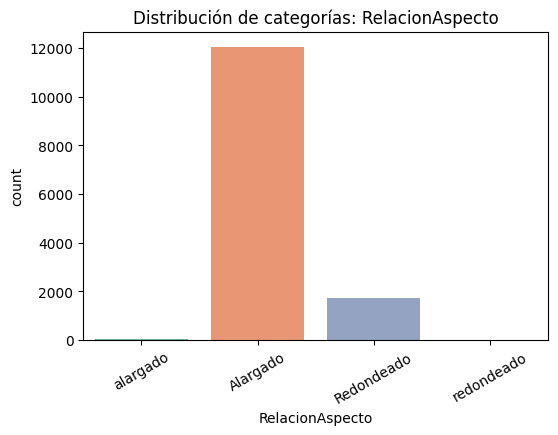

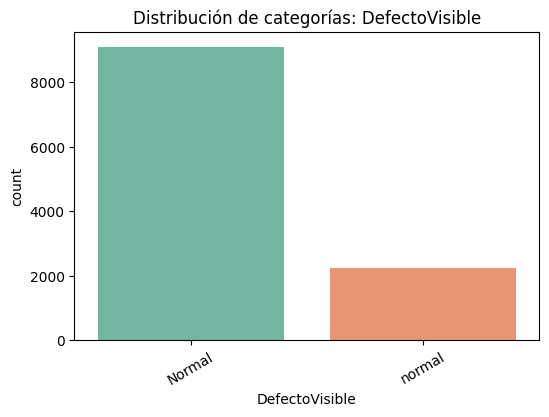

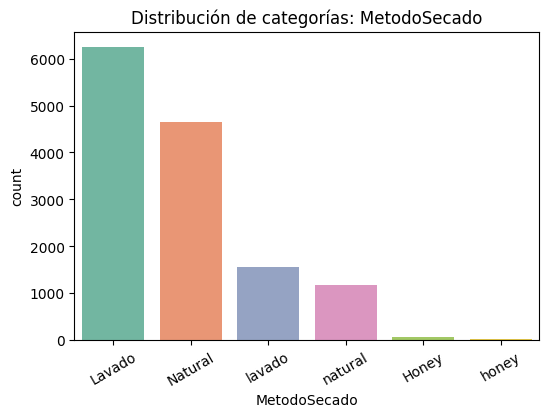

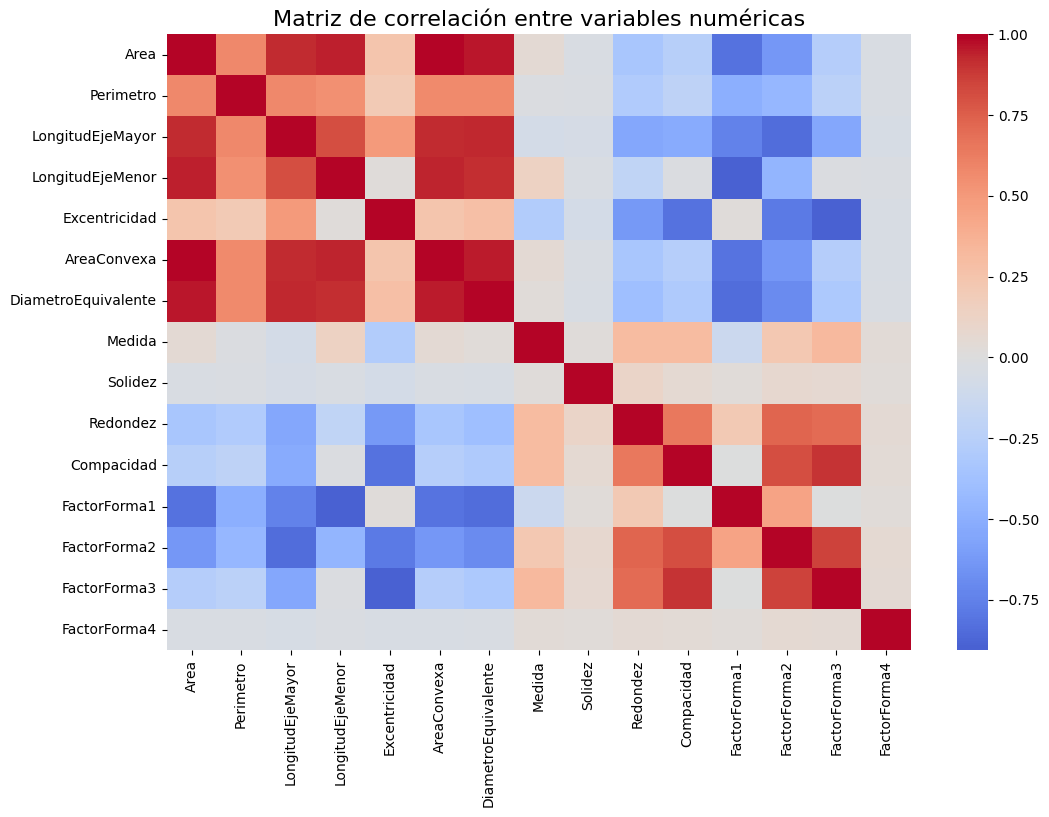

In [69]:
# --- 1. Histogramas para las columnas numéricas ---
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

df[num_cols].hist(
    bins=30, figsize=(15, 12), edgecolor="black", color="skyblue"
)
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

# --- 2. Boxplots para detectar outliers en numéricas ---
plt.figure(figsize=(15, 8))
df[num_cols].plot(kind="box", subplots=True, layout=(4, 5), figsize=(20, 15))
plt.suptitle("Boxplots de variables numéricas", fontsize=16)
plt.show()

# --- 3. Conteo de valores para las categóricas ---
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c != 'ID']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        x=df[col], 
        hue=df[col],      
        palette="Set2", 
        legend=False     
    )
    plt.title(f"Distribución de categorías: {col}")
    plt.xticks(rotation=30)
    plt.show()

# --- 4. Matriz de correlación (solo numéricas) ---
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas", fontsize=16)
plt.show()


Ahora bien, ya que se realizo el analisis correspondiente lo primero con lo que nos encontramos es que el dataset cargado cuenta con las siguientes dimensiones (filas, columnas): (14291, 19). La visualizacion de los valores por columna nos permite identificar que contamos con 4 columnas que poseen valores categoricos y 15 columnas que poseen valores numericos. Ahora bien, dentro de esta visualizacion tambien nos encontramos con que tenemos la siguiente cantidad de valores nulos por columna, antes de realizar cualquier tipo de limpieza (dicese de valores duplicados), en 14291 registros:

* Perímetro (1237) → ≈ 8.6%

* LongitudEjeMayor (401) → ≈ 2.8%

* RelaciónAspecto (466) → ≈ 3.2%

* Excentricidad (604) → ≈ 4.2%

* ÁreaConvexa (1423) → ≈ 10%

* DiámetroEquivalente (1923) → ≈ 13.4%

* Solidez (2306) → ≈ 16.1%

* Redondez (2063) → ≈ 14.4%

* Compacidad (650) → ≈ 4.5%

* FactorForma1 (1119) → ≈ 7.8%

* FactorForma2 (1106) → ≈ 7.7%

* FactorForma3 (478) → ≈ 3.3%

* FactorForma4 (1159) → ≈ 8.1%

* DefectoVisible (2935) → ≈ 20.5%

* MétodoSecado (587) → ≈ 4.1%







In [32]:
df = df.drop_duplicates()

# Revisar dimensiones
print("Dimensiones del dataset (filas, columnas):", df.shape)

# Revisión rápida de valores nulos
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Mostrar columnas disponibles
print("Columnas originales:\n", df.columns.tolist())

# Decisión: mantener todas las columnas excepto el ID
columnas_a_mantener = [
    "Area",
    "Perimetro",
    "LongitudEjeMayor",
    "LongitudEjeMenor",
    "RelacionAspecto",
    "Excentricidad",
    "AreaConvexa",
    "DiametroEquivalente",
    "Medida",
    "Solidez",
    "Redondez",
    "Compacidad",
    "FactorForma1",
    "FactorForma2",
    "FactorForma3",
    "FactorForma4",
    "DefectoVisible",
    "MetodoSecado"
]

columnas_a_usar = [c for c in columnas_a_mantener if c in df.columns]

df_reducido = df[columnas_a_usar].copy()

print("Columnas seleccionadas para el análisis:")
print(df_reducido.columns.tolist())



Dimensiones del dataset (filas, columnas): (13830, 19)
Conteo de valores nulos por columna:
ID                        0
Area                      0
Perimetro              1197
LongitudEjeMayor        388
LongitudEjeMenor          0
RelacionAspecto         448
Excentricidad           582
AreaConvexa            1381
DiametroEquivalente    1852
Medida                    0
Solidez                2218
Redondez               2007
Compacidad              633
FactorForma1           1087
FactorForma2           1067
FactorForma3            460
FactorForma4           1123
DefectoVisible         2832
MetodoSecado            562
dtype: int64
Columnas originales:
 ['ID', 'Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'RelacionAspecto', 'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4', 'DefectoVisible', 'MetodoSecado']
Columnas seleccionadas para el análisis:
['Area', 'Per

**Nota:** Se realizo un proceso de filtrado para la columna "ID" ya que esta no aporta nada para el modelo y puede obstruir el modelado que se le va a realizar a los datos

Una vez que ya se ha realizado el proceso de limpieza de valores duplicados, quedamos con la siguiente relacion de datos NaN en un dataset que ahora cuenta con **13830 registros**

* Perímetro (1197) → ≈ 8.4%

* LongitudEjeMayor (388) → ≈ 2.7%

* RelaciónAspecto (448) → ≈ 3.1%

* Excentricidad (582) → ≈ 4.1%

* ÁreaConvexa (1381) → ≈ 9.7%

* DiámetroEquivalente (1852) → ≈ 12.9%

* Solidez (2218) → ≈ 15.5%

* Redondez (2007) → ≈ 14.0%

* Compacidad (633) → ≈ 4.4%

* FactorForma1 (1087) → ≈ 7.6%

* FactorForma2 (1067) → ≈ 7.5%

* FactorForma3 (460) → ≈ 3.2%

* FactorForma4 (1123) → ≈ 7.9%

* DefectoVisible (2832) → ≈ 19.8%

* MétodoSecado (562) → ≈ 3.9%

Partiendo de la relacion que tenemos en este momento, no seria factible eliminar los registros NaN ya que en algunas columnas como lo son **DefectoVisible** estariamos perdiendo casi el 20% de los datos, asi mismo, en columnas como **DiametroEquivalente** se perderia casi el 13% de los datos que tenemos. Con lo cual es necesario recurrir a una estrategia de imputacion para no perder todos estos registros.

Por lo cual se va a realizar la siguiente imputacion para los valores que esten como NaN en las columnas, de la siguiente forma:

- **Columnas a imputar con mediana**
= ['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 
                'DiametroEquivalente']

- **Columnas a imputar con KNN**
= ['Excentricidad', 'Solidez', 'Redondez', 
            'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']

- **Categóricas - Procesar con OneHotEncoding**
 = ['DefectoVisible', 'MétodoSecado', 'RelacionAspecto']


Por otra parte, y haciendo uso de la funcion **.describe()** en las columnas que tienen valores numericos nos encontramos con que existen ciertos valores que se encuentran como negativos en columnas que estan manejando medidas fisicas como lo son "Area", "Perimetro", "LongitudEjeMayor", "LongitudEjeMenor", "ÁreaConvexa" y "DiámetroEquivalente". De igual forma, columnas que estan manejando valores de proporcion como "Medida", "Solidez", "Redondez", "Compacidad" tampoco deberian de tener valores negativos presentes. A todos estos registros que sean negativos se los va a tratar como NaN y se va a realizar un proceso de imputacion como en el que menciono previamente. 

**Nota**: Para los FactoresForma, como no se conoce especificamente como fue que se realizaron (a nivel matematico) no se les va a realizar imputacion debido a que los valores negativos pueden ser legitimos.

No obstante, cabe resaltar que tambien es necesario aplicar un proceso de **OneHotEncoding** para la 3 columnas categoricas con las que nos quedamos para poder despues usarlas en el modelo. De igual forma, se va a aplicar una estrategia para pasar todos los strings a minusculas tal que se evite algun error con el procedimiento de OHE. Lo anterior , partiendo de que en los valores que se muestran en la distribucion de categorias hay elementos que son los mismos pero se pueden llegar a identificar como distintos, tal como "Normal" y "normal".

Finalmente, se va a aplicar un proceso de escalado mediante el uso de **StandardScaler**, el cual va a permtir que los datos numericos (evitando aquellos que se hayan introducido por OHE) sean estandarizados.


### **Preprocesamiento:**

In [70]:

# Normalizamos a minusculas
df_reducido['DefectoVisible'] = df_reducido['DefectoVisible'].str.lower().str.strip()
df_reducido['MetodoSecado']   = df_reducido['MetodoSecado'].str.lower().str.strip()
df_reducido['RelacionAspecto'] = df_reducido['RelacionAspecto'].str.lower().str.strip()

# --- 1. Definir grupos de columnas según la estrategia de imputación ---

# Medidas físicas (mediana)
cols_fisicas = [
    "Area", "Perimetro", "LongitudEjeMayor", 
    "LongitudEjeMenor", "AreaConvexa", "DiametroEquivalente"
]

# Proporciones/derivadas (KNN)
cols_knn = ["Excentricidad", "Solidez", "Redondez",
    "Compacidad", "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4"
]

# Categóricas (moda)
cols_cat = ["DefectoVisible", "MetodoSecado", "RelacionAspecto"]

# --- 2. Reemplazar valores negativos por NaN en columnas que no los permiten ---
for col in cols_fisicas + ["Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad"]:
    df_reducido.loc[df_reducido[col] < 0, col] = np.nan

# --- 3. Definir transformadores ---

# Mediana para físicas + StandardScaler
imputer_mediana = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# KNN para proporciones y derivados + StandardScaler
imputer_knn = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

# Moda para categóricas + OneHotEncoding
imputer_cat = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# --- 4. ColumnTransformer que aplica cada estrategia a su grupo ---
preprocessor = ColumnTransformer(
    transformers=[
        ("mediana", imputer_mediana, cols_fisicas),
        ("knn", imputer_knn, cols_knn),
        ("cat", imputer_cat, cols_cat)
    ],
    remainder="passthrough"  # mantiene el resto de columnas tal cual
)

# --- 5. Aplicar el preprocesador ---
df_procesado = preprocessor.fit_transform(df_reducido)

# Obtención de nombres de columnas transformadas
cat_cols_encoded = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cols_cat)
all_cols = cols_fisicas + cols_knn + list(cat_cols_encoded) + [c for c in df_reducido.columns if c not in cols_fisicas + cols_knn + cols_cat]

df_procesado = pd.DataFrame(df_procesado, columns=all_cols)

print("\n")
print("Dimensiones del dataset procesado (filas, columnas):", df_procesado.shape)
print("\n")
print("Columnas del dataset procesado:")
print(df_procesado.columns.tolist())
print("\n")
print("Descripción estadística del dataset procesado:")
print(df_procesado.describe())
print("Eliminar el valor nulo en el dataframe ya procesado")
df_procesado = df_procesado.dropna(subset=["Medida"])
# Revisión rápida de valores nulos
print("Conteo de valores nulos por columna:")
print(df_procesado.isnull().sum())







Dimensiones del dataset procesado (filas, columnas): (13830, 21)


Columnas del dataset procesado:
['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'AreaConvexa', 'DiametroEquivalente', 'Excentricidad', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4', 'DefectoVisible_normal', 'MetodoSecado_honey', 'MetodoSecado_lavado', 'MetodoSecado_natural', 'RelacionAspecto_alargado', 'RelacionAspecto_redondeado', 'Medida']


Descripción estadística del dataset procesado:
               Area     Perimetro  LongitudEjeMayor  LongitudEjeMenor  \
count  1.383000e+04  1.383000e+04      1.383000e+04      1.383000e+04   
mean  -8.143241e-17 -5.805591e-17     -2.825730e-17      3.519319e-16   
std    1.000036e+00  1.000036e+00      1.000036e+00      1.000036e+00   
min   -1.114007e+00 -2.486368e+00     -1.606610e+00     -1.775696e+00   
25%   -5.695919e-01 -2.798506e-01     -7.715131e-01     -5.868329e-01   
50%   -2.857571e-01 -1.900651e-0

## **2. Modelado usando algoritmos de Agrupacion**

Para la parte del modelado se realizo la siguiente division entre los integrantes del grupo para la presentacion de los 3 algoritmos requeridos:

- **Santiago Cabra Chavez - Algortimo K-Means**
- **Tatiana Vera Hernandez - Algoritmo GMM**
- **Andres Cardenas Layton - Algortimo DBSCAN**



### **Algoritmo K-Means**



Se utilizo el algoritmo K-means para agrupar los datos en K clusters. El proceso se especifica en los siguientes pasos:

* Elegir el número de clusters (k), apoyandonos en el método del codo y el coeficiente de silueta.

* Inicializar centroides con k-means++, para mejorar la estabilidad.

* Asignar cada punto al centroide más cercano usando distancia euclidiana.

* Recalcular los centroides con el promedio de los puntos.

* Repetir hasta que los centroides ya no cambien o se alcance el máximo de iteraciones.

Por otra parte, algunas de las decisiones mas importantes tomadas incluyen:

* K-optimo: definido con métodos de validación como 4 y 5 haciendo uso de los resultados mostrados por los graficos.

* Inicialización: k-means++ para evitar malos arranques.

* Distancia: euclidiana.

* Iteraciones: maximo 300.

* Repeticiones de 2 a 10 clusters para identificar un buen resultado.

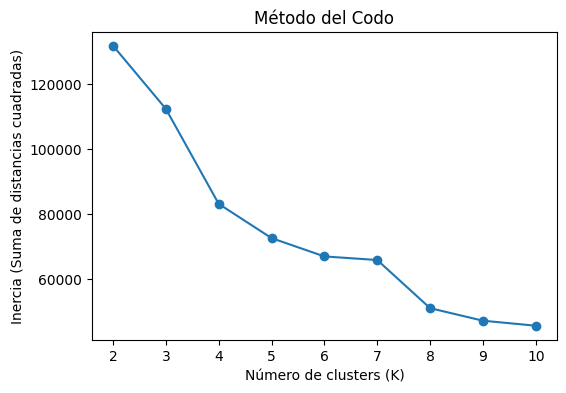

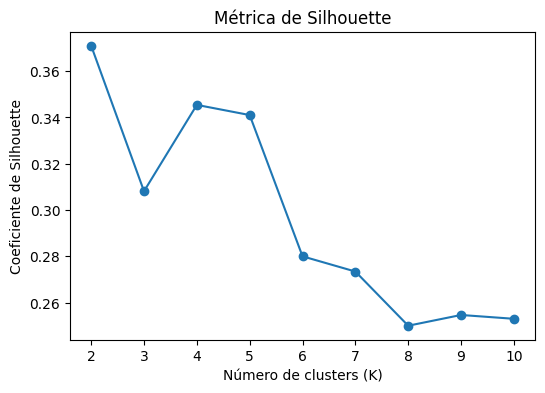

Tamaños de clusters (k=4):
Cluster
2    6133
1    5162
0    2004
3     530
Name: count, dtype: int64 

Tamaños de clusters (k=5):
Cluster
2    6118
3    3002
1    2202
0    1983
4     524
Name: count, dtype: int64 

Centroides (k=4):
       Area  Perimetro  LongitudEjeMayor  LongitudEjeMenor  AreaConvexa  \
0 -0.469069  -0.345135         -0.834852         -0.021436    -0.447806   
1  0.396156   0.380037          0.718791          0.289983     0.388698   
2 -0.534670  -0.381069         -0.602614         -0.567179    -0.508373   
3  4.101452   2.012002          3.126543          3.821060     3.789416   

   DiametroEquivalente  Excentricidad   Solidez  Redondez  Compacidad  ...  \
0            -0.474131      -1.902996  0.697263  1.254879    1.639778  ...   
1             0.503382       0.767923 -0.542093 -0.989439   -0.863407  ...   
2            -0.564047      -0.044144  0.238755  0.438554    0.202147  ...   
3             3.415989       0.218270 -0.118225 -0.178651   -0.122869  ...   


In [71]:

# --- 1. Probar distintos K ---
inertia = []   # para el método del codo
silhouette = []  # para la métrica de silueta
K_range = range(2, 11)  # probamos de 2 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_procesado)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_procesado, kmeans.labels_))

# --- 2. Gráfico del codo ---
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'o-')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.title("Método del Codo")
plt.show()

# --- 3. Gráfico de Silhouette ---
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette, 'o-')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Métrica de Silhouette")
plt.show()

# --- 4. Entrenar modelo final con K óptimos ---
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)

labels_4 = kmeans_4.fit_predict(df_procesado)
labels_5 = kmeans_5.fit_predict(df_procesado)

# --- 5. Añadimos las etiquetas a los dataframes ---
df_clusters_4 = df_procesado.copy()
df_clusters_4["Cluster"] = labels_4

df_clusters_5 = df_procesado.copy()
df_clusters_5["Cluster"] = labels_5

# --- 6. Tamaños de cluster ---
print("Tamaños de clusters (k=4):")
print(df_clusters_4["Cluster"].value_counts(), "\n")

print("Tamaños de clusters (k=5):")
print(df_clusters_5["Cluster"].value_counts(), "\n")

# --- 7. Centroides ---
print("Centroides (k=4):")
print(pd.DataFrame(kmeans_4.cluster_centers_, columns=df_procesado.columns), "\n")

print("Centroides (k=5):")
print(pd.DataFrame(kmeans_5.cluster_centers_, columns=df_procesado.columns), "\n")

# --- 8. Distribución de variables categóricas en los clusters ---
# Para K=4
print("\nDistribución categórica por cluster (k=4):")
print(df_clusters_4.groupby("Cluster")[["DefectoVisible_normal",
                                        "MetodoSecado_honey",
                                        "MetodoSecado_lavado",
                                        "MetodoSecado_natural",
                                        "RelacionAspecto_alargado",
                                        "RelacionAspecto_redondeado"]].mean())

# Para K=5
print("\nDistribución categórica por cluster (k=5):")
print(df_clusters_5.groupby("Cluster")[["DefectoVisible_normal",
                                        "MetodoSecado_honey",
                                        "MetodoSecado_lavado",
                                        "MetodoSecado_natural",
                                        "RelacionAspecto_alargado",
                                        "RelacionAspecto_redondeado"]].mean())


### **Algoritmo DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) fue elegido como uno de los algoritmos de clustering porque ofrece ventajas importantes frente a métodos como K-Means:

* No requiere especificar el número de clusters: los grupos se forman de manera natural según la densidad de los datos.
* Detecta ruido y outliers: puede identificar puntos que no pertenecen a ningún cluster, lo cual es útil para SenecaféAlpes al momento de detectar granos atípicos o defectuosos.
* Clusters con formas arbitrarias: a diferencia de K-Means, que asume clusters esféricos, DBSCAN permite detectar grupos con distintas formas y tamaños.
* Adecuado para datos con variabilidad: dado que los granos de café presentan diversidad en sus medidas físicas y morfológicas, DBSCAN es un buen complemento para encontrar subgrupos naturales en los datos.

El algoritmo DBSCAN se basa en dos parámetros principales:

* eps (radio de vecindad): define la distancia máxima para que dos puntos sean considerados "vecinos".
* min_samples (mínimo de puntos): número mínimo de vecinos necesarios para que un punto sea considerado un "punto central".

Con estas reglas:
1. Un punto central tiene al menos min_samples vecinos dentro de la distancia eps.
2. Los puntos alcanzables desde un punto central forman parte del mismo cluster.
3. Los puntos que no cumplen estas condiciones son etiquetados como ruido (-1).

De esta manera, DBSCAN agrupa automáticamente las regiones densas de datos y separa los valores atípicos, lo que permite descubrir tanto clusters grandes como pequeños, además de identificar granos anómalos.


In [72]:
from sklearn.cluster import DBSCAN

#Probar DBSCAN con distintos parámetros
eps_values = [0.5, 1.0, 1.5, 2.0]   # radios de vecindad a probar
min_samples_values = [5, 10, 20]    # tamaño mínimo de vecinos

results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(df_procesado)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Calcular silueta solo si hay más de 1 cluster
        if n_clusters > 1:
            sil_score = silhouette_score(df_procesado, labels)
        else:
            sil_score = -1
        
        results.append((eps, min_samples, n_clusters, n_noise, sil_score))

# Mostrar resultados
results_df = pd.DataFrame(results, columns=["eps", "min_samples", "clusters", "ruido", "silueta"])
print("Resultados de DBSCAN:")
print(results_df.sort_values(by="silueta", ascending=False))

#Entrenar modelo final con mejores hiperparámetros ---
best_eps = 2.0   
best_min_samples = 10

dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples, n_jobs=-1)
labels_db = dbscan_final.fit_predict(df_procesado)

df_dbscan = df_procesado.copy()
df_dbscan["Cluster_DBSCAN"] = labels_db

# Resumen
print("\nCantidad de clusters encontrados (sin contar ruido):", 
      len(set(labels_db)) - (1 if -1 in labels_db else 0))
print("Cantidad de puntos de ruido:", list(labels_db).count(-1))

Resultados de DBSCAN:
    eps  min_samples  clusters  ruido   silueta
9   2.0            5         5    126  0.487134
10  2.0           10         5    151  0.486575
11  2.0           20         4    220  0.485313
7   1.5           10         6    394  0.163105
8   1.5           20         4    537  0.157583
6   1.5            5        13    267  0.106860
3   1.0            5        18    962  0.009037
5   1.0           20        12   1644 -0.005743
4   1.0           10        12   1273 -0.044055
2   0.5           20         8   6795 -0.084490
1   0.5           10        18   5497 -0.095777
0   0.5            5        53   4349 -0.381789

Cantidad de clusters encontrados (sin contar ruido): 5
Cantidad de puntos de ruido: 151


In [73]:
#Distribución de clusters
print(df_dbscan["Cluster_DBSCAN"].value_counts())

#Distribución de variables categóricas por cluster
print("\nDistribución categórica por cluster (DBSCAN):")
print(df_dbscan.groupby("Cluster_DBSCAN")[[
    "DefectoVisible_normal",
    "MetodoSecado_honey",
    "MetodoSecado_lavado",
    "MetodoSecado_natural",
    "RelacionAspecto_alargado",
    "RelacionAspecto_redondeado"
]].mean())

Cluster_DBSCAN
 0    13545
-1      151
 1       44
 2       38
 3       33
 4       18
Name: count, dtype: int64

Distribución categórica por cluster (DBSCAN):
                DefectoVisible_normal  MetodoSecado_honey  \
Cluster_DBSCAN                                              
-1                                1.0            0.033113   
 0                                1.0            0.005168   
 1                                1.0            0.000000   
 2                                1.0            0.000000   
 3                                1.0            0.000000   
 4                                1.0            0.000000   

                MetodoSecado_lavado  MetodoSecado_natural  \
Cluster_DBSCAN                                              
-1                         0.496689              0.470199   
 0                         0.583758              0.411074   
 1                         0.795455              0.204545   
 2                         0.894737           

Al aplicar DBSCAN con los parámetros eps=2.0 y min_samples=10, se obtuvo un coeficiente de silueta de 0.486. Esto indica que la separación y cohesión de los grupos es mejor en este modelo.  

Los resultados fueron los siguientes:
* Número de clusters identificados (sin ruido): 5
* Cantidad de puntos de ruido: 151 (~1.1% del total)
* Distribución de los clusters:
  * Cluster 0: 13,545 granos (≈98% de los datos). Predominan los métodos de secado lavado (58%) y natural (41%), con relación de aspecto principalmente alargado (87%).  
  * Cluster 1: 44 granos. Mayormente lavado (79%), con 100% de relación de aspecto alargado.  
  * Cluster 2: 38 granos. Dominado por lavado (89%), también con 100% alargado.  
  * Cluster 3: 33 granos. Combinación de lavado (76%) y natural (24%), 100% alargado.  
  * Cluster 4: 18 granos. Principalmente lavado (83%), 100% alargado.  
  * Ruido (-1): 151 granos atípicos, con distribución equilibrada entre lavado (49%) y natural (47%), y un 88% alargado.

### Interpretación
1. Cluster principal: La mayoría de los granos caen en el cluster 0, lo que muestra que existe un grupo dominante de granos con características similares, asociado a los dos métodos de secado más usados (lavado y natural).  
2. Subgrupos pequeños: Clusters 1 a 4 contienen pocos granos, pero muestran una fuerte consistencia (predominio del secado por lavado y aspecto alargado). Estos grupos pueden reflejar variantes morfológicas específicas o lotes particulares.  
3. Outliers: El ruido (-1) corresponde a granos que no se parecen lo suficiente a ningún cluster. Desde la perspectiva del negocio, estos podrían representar granos defectuosos o especiales que conviene aislar en el proceso de control de calidad.  
4. Valor agregado frente a K-Means: A diferencia de K-Means, DBSCAN no solo identifica clusters grandes, sino que también detecta subgrupos pequeños y ruido, lo que aporta información más rica sobre la heterogeneidad de los granos.

El DBSCAN es una herramienta útil para SenecaféAlpes, ya que permite no solo segmentar los granos de café en grupos naturales, sino también identificar aquellos que son atípicos. Esto puede ayudar tanto en el control de calidad (aislar defectos) como en la optimización de mezclas (aprovechando subgrupos con características particulares).


### **Algoritmo GMM**

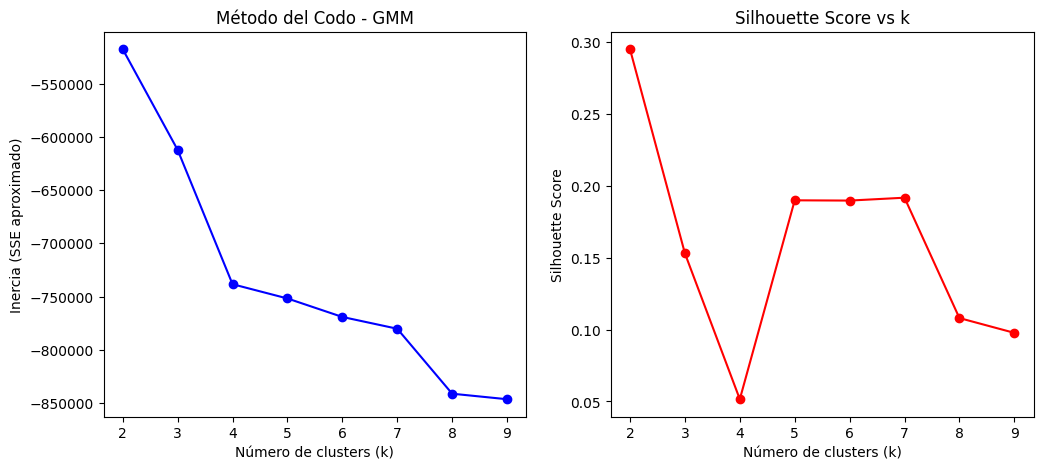

Distribución de clusters:
 cluster_gmm
2    9464
1    2849
0    1517
Name: count, dtype: int64


In [77]:
# 1. Definir X procesado
# Si la columna cluster_gmm existe, se elimina; si no, ignora el error
X = df_processed.drop(columns=["cluster_gmm"], errors="ignore").values

# 2. Método del codo para GMM
inertias = []
silhouettes = []
K = range(2, 10)  # probamos varios valores de k

for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    
    # "Inercia" aproximada: usamos la log-verosimilitud negativa como proxy
    inertias.append(-gmm.score(X) * X.shape[0])
    silhouettes.append(silhouette_score(X, labels))

# 3. Graficar Elbow y Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, "bo-")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE aproximado)")
plt.title("Método del Codo - GMM")

plt.subplot(1,2,2)
plt.plot(K, silhouettes, "ro-")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")

plt.show()

# 4. Entrenar modelo final con k óptimo
best_k = 3
gmm = GaussianMixture(n_components=best_k, covariance_type="full", random_state=42)
df_processed["cluster_gmm"] = gmm.fit_predict(X)

print("Distribución de clusters:\n", df_processed["cluster_gmm"].value_counts())

In [ ]:
# Centroides y distribución por cluster con GMM
# Asegurarnos de que la columna cluster_gmm exista
if "cluster_gmm" not in df_processed.columns:
    df_processed["cluster_gmm"] = gmm.fit_predict(X)

# Extraer centroides del modelo
centroids = gmm.means_

# Verificar dimensiones
num_cols = len(df_processed.drop(columns=["cluster_gmm"]).columns)
print("Forma de centroides:", centroids.shape)
print("Número de columnas en df_processed:", num_cols)

if centroids.shape[1] != num_cols:
    raise ValueError(" El número de columnas en los centroides no coincide con df_processed. Revisa el preprocesamiento.")

# Crear DataFrame con los centroides (sin incluir cluster_gmm)
centroids_df = pd.DataFrame(
    centroids,
    columns=df_processed.drop(columns=["cluster_gmm"]).columns
)
print("Centroides de cada cluster:")
print(centroids_df)


# Distribución de variables categóricas por cluster

# Filtramos solo columnas categóricas (OneHotEncoder)
categorical_cols = [
    col for col in df_processed.columns 
    if col.startswith("DefectoVisible") 
    or col.startswith("MetodoSecado") 
    or col.startswith("RelacionAspecto")
]

# Mostrar distribución promedio de cada categoría por cluster
for col in categorical_cols:
    print(f"\nDistribución de {col} por cluster:")
    print(df_processed.groupby("cluster_gmm")[col].mean())

# Tabla resumen de categorías por cluster
cat_distribution = df_processed.groupby("cluster_gmm")[categorical_cols].mean().T
print("\nTabla resumen de categorías por cluster:")
print(cat_distribution)

Forma de centroides: (3, 27)
Número de columnas en df_processed: 27
✅ Centroides de cada cluster:
       Area  Perimetro  LongitudEjeMayor  LongitudEjeMenor  Excentricidad  \
0 -0.471669  -0.347171         -0.859073         -0.020664      -0.448716   
1  0.681268   0.318383          0.513867          0.622161       0.570155   
2 -0.129926  -0.040391         -0.017276         -0.184427      -0.100078   

   AreaConvexa  DiametroEquivalente    Medida   Solidez  Redondez  ...  \
0    -0.467566            -1.979613  0.146163  1.231588  1.591898  ...   
1     0.534167             0.114387 -0.009344 -0.125905 -0.102943  ...   
2    -0.086195             0.282994 -0.020624 -0.159542 -0.224261  ...   

   DefectoVisible_Honey  DefectoVisible_Lavado  DefectoVisible_Natural  \
0              0.748494               0.001977                0.008569   
1              0.479659               0.333123                0.000000   
2              0.427904               0.374385                0.000000   


### Justificación de la elección de 3 clusters

- **Método del Codo**: el punto de inflexión aparece en k=4, donde la reducción de error se estabiliza.  
- **Silhouette Score**: máximo en k=2 (~0.30), indicando buena separación, pero con solo dos grupos se pierde granularidad.  
- **Compromiso práctico**: se seleccionó k=3 como solución intermedia porque:
  - Permite segmentar en tres perfiles distintos (dominantes, intermedios y minoritarios).  
  - Aporta mayor utilidad de negocio al diferenciar tipos de grano en estrategias de calidad y comercialización.  
  - Aunque el Silhouette baja respecto a k=2, se gana en interpretabilidad y valor organizacional.

### Interpretacion de Clusters con GMM (k=3)


### **Métricas Clustering**

                     Modelo  Clusters  Ruido (%)  Silueta  Davies-Bouldin ↓  \
0              KMeans (k=4)         4       0.00    0.345             0.968   
1              KMeans (k=5)         5       0.00    0.341             1.089   
2  DBSCAN (eps=2.0, min=10)         5       1.09    0.487             1.889   

   Calinski-Harabasz ↑  
0             6673.912  
1             6233.832  
2              212.104  


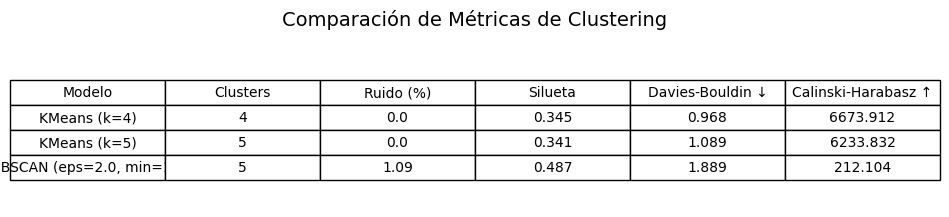

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluar_modelo(X, labels, nombre_modelo):
    """
    Calcula métricas de evaluación para clustering.
    Retorna un diccionario con resultados.
    """
    # Número de clusters (sin contar ruido -1 si existe)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Proporción de ruido 
    noise_ratio = list(labels).count(-1) / len(labels) if -1 in labels else 0
    
    # Métricas internas
    if n_clusters > 1:
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
        chi = calinski_harabasz_score(X, labels)
    else:
        sil, dbi, chi = -1, -1, -1  # no se pueden calcular con 1 cluster
    
    return {
        "Modelo": nombre_modelo,
        "Clusters": n_clusters,
        "Ruido (%)": round(noise_ratio * 100, 2),
        "Silueta": round(sil, 3),
        "Davies-Bouldin ↓": round(dbi, 3),
        "Calinski-Harabasz ↑": round(chi, 3)
    }

# Evaluaciones
labels_k4 = kmeans_4.labels_
res_k4 = evaluar_modelo(df_procesado, labels_k4, "KMeans (k=4)")

labels_k5 = kmeans_5.labels_
res_k5 = evaluar_modelo(df_procesado, labels_k5, "KMeans (k=5)")

labels_db = dbscan_final.labels_
res_db = evaluar_modelo(df_procesado, labels_db, "DBSCAN (eps=2.0, min=10)")

# Crear DataFrame comparativo
df_resultados = pd.DataFrame([res_k4, res_k5, res_db])
print(df_resultados)

# Visualizar tabla bonita con matplotlib
fig, ax = plt.subplots(figsize=(10, 2))  # Ajusta tamaño según necesites
ax.axis('off')

tabla = ax.table(
    cellText=df_resultados.values,
    colLabels=df_resultados.columns,
    cellLoc='center',
    loc='center'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.5)  # Ajustar tamaño de celdas

plt.title("Comparación de Métricas de Clustering", fontsize=14, pad=20)
plt.show()



Número de clusters:

* KMeans con k=4 y k=5 produjo soluciones balanceadas sin ruido.

* DBSCAN encontró también 5 clusters, pero añadió ~1.1% de ruido (151 granos considerados atípicos).

Silueta:

* DBSCAN: 0.487, claramente mejor que KMeans (0.345 – 0.341) Esto indica que la cohesión y separación de clusters en DBSCAN es más fuerte.

Davies-Bouldin: (DBI, más bajo es mejor)

* KMeans obtuvo valores más bajos (0.968 – 1.089) que DBSCAN (1.889). Esto significa que los clusters de KMeans son más compactos y cercanos a la idea “esférica” que esta métrica favorece.

Calinski-Harabasz: (CHI, más alto es mejor)

* KMeans tiene valores mucho más altos (>6200) comparados con DBSCAN (212). Esto se debe a que DBSCAN no busca clusters bien distribuidos en varianza global, sino regiones densas, lo que afecta este indicador.